#Theoritical Questions

**Question 1**
What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.

**Answer 1**
Deep learning represents a subset of machine learning using multi-layered neural networks to automatically learn hierarchical feature representations from raw data.

It evolved from early perceptrons in the 1950s, through backpropagation in the 1980s, and exploded post-2012 with AlexNet's ImageNet win, fueled by GPUs, big data, and frameworks like TensorFlow.

Unlike traditional machine learning requiring manual feature engineering, deep learning extracts features end-to-end, excelling in unstructured data like images and text.

**Question 2**
Explain the basic architecture and functioning of a Perceptron. What are its limitations?

**Answer 2**
A perceptron consists of inputs connected to a single output neuron via weighted connections, a bias term, and a step activation function that outputs 1 if the weighted sum exceeds a threshold, else 0.

It functions by adjusting weights iteratively using the perceptron learning rule to minimize misclassifications on linearly separable data like logical gates.

Limitations include inability to solve non-linearly separable problems like XOR, lack of learning rates leading to slow convergence, and binary output restricting multi-class tasks.

**Question 3**
Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.

**Answer 3**
Activation functions introduce non-linearity, enabling networks to model complex patterns beyond linear transformations.

Sigmoid squashes inputs to (0,1), smooth but suffers vanishing gradients for deep nets; ReLU outputs max(0,x), fast and mitigates vanishing gradients but risks “dying” neurons; Tanh maps to (-1,1), zero-centered for better convergence than sigmoid but still prone to vanishing gradients.

**Question 4**
What is the difference between Loss function and Cost function in neural
networks? Provide examples.

**Answer 4**
Loss function measures error for a single training example, like binary cross-entropy for one prediction.

Cost function averages loss over the entire dataset, such as mean squared error across all samples.

Example: For classification, per-sample loss is cross-entropy. Total cost is its mean.

**Question 5**
What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.

**Answer 5**
Optimizers update model weights to minimize cost using gradients. Gradient Descent computes global gradient for batch updates.

Adam adapts learning rates per parameter with momentum and RMSProp-like scaling for faster, stable convergence.

RMSprop fixes AdaGrad's diminishing rates via exponentially decaying averages, suiting noisy gradients.


#Practical Questions

In [7]:
#6 Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

# AND gate data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
np.random.seed(42)
w = np.random.randn(2)
b = 0
lr = 0.1
epochs = 10

# Training
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        pred = 1 if z > 0 else 0
        error = y[i] - pred
        w += lr * error * X[i]
        b += lr * error

# Test
print("Predictions:")
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    pred = 1 if z > 0 else 0
    print(f"{X[i]} -> {pred}")


Predictions:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


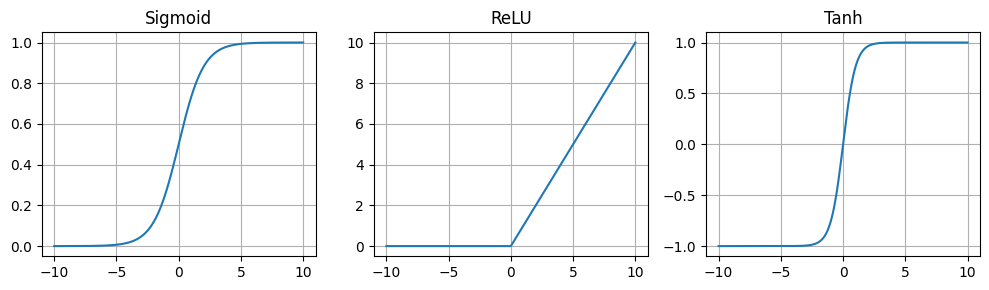

In [9]:
#7 Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.figure(figsize=(10, 3))
plt.subplot(1,3,1); plt.plot(x, sigmoid); plt.title('Sigmoid'); plt.grid(True)
plt.subplot(1,3,2); plt.plot(x, relu); plt.title('ReLU'); plt.grid(True)
plt.subplot(1,3,3); plt.plot(x, tanh); plt.title('Tanh'); plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#8 Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow.keras import layers, models
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)
print("Training accuracy:", model.evaluate(x_train, y_train, verbose=0)[1])


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8287 - loss: 0.6247
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9515 - loss: 0.1751
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9666 - loss: 0.1187
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0906
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0722
Training accuracy: 0.9838166832923889


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7341 - loss: 0.7954 - val_accuracy: 0.8460 - val_loss: 0.4490
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.4299 - val_accuracy: 0.8561 - val_loss: 0.4150
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3775 - val_accuracy: 0.8702 - val_loss: 0.3764
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3593 - val_accuracy: 0.8732 - val_loss: 0.3677
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3317 - val_accuracy: 0.8768 - val_loss: 0.3455
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8878 - loss: 0.3092 - val_accuracy: 0.8773 - val_loss: 0.3422
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8910 - loss: 0.2989 - val_accuracy: 0.8751 - val_loss: 0.3484
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8956 - loss: 0.2869 - val_accuracy: 0.

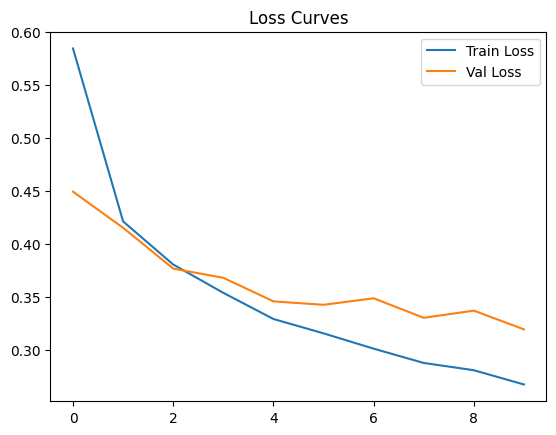

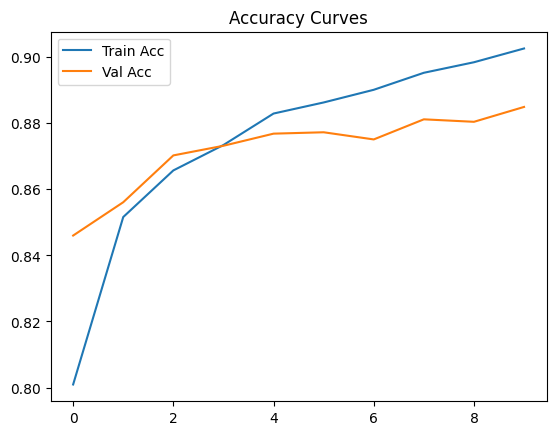

In [14]:
#9 Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Curves'); plt.show()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Curves'); plt.show()


**Question 10**

You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?

In [17]:
# Answer 10

import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
# Synthetic imbalanced fraud data (features: amount, merchant_id_encoded, location_encoded)
X = np.random.randn(10000, 3); X[:,0] = np.abs(X[:,0]*1000 + 5000)  # amount
y = np.zeros(10000); y[np.random.choice(10000, 100, replace=False)] = 1  # 1% fraud
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
model.fit(X, y, epochs=10, class_weight={0:1,1:class_weights[1]}, validation_split=0.2)
print("AUC:", model.evaluate(X, y)[1])


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.4883 - loss: 314.6500 - val_auc: 0.5000 - val_loss: 1.3595
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.4636 - loss: 180.8702 - val_auc: 0.5000 - val_loss: 1.0221
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5005 - loss: 130.9906 - val_auc: 0.5000 - val_loss: 1.0638
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.5048 - loss: 85.9664 - val_auc: 0.5000 - val_loss: 0.3085
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5088 - loss: 56.1832 - val_auc: 0.4992 - val_loss: 0.1238
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4836 - loss: 48.8936 - val_auc: 0.5000 - val_loss: 0.6166
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4690 - loss: 24.4856 - val_auc: 0.5120 - val_loss: 0.0915
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5506 - loss: 14.2386 - val_auc: 0.4922 - val_loss: 0.0965
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - au

For this fraud-detection scenario, a multilayer neural network with careful handling of class imbalance, regularization, and deployment constraints is more suitable than a single perceptron.

## Model design (perceptron vs multilayer NN)
A single perceptron can only learn linearly separable boundaries, which is not sufficient for complex fraud patterns involving interactions between amount, merchant, and location features. A multilayer feed-forward neural network (MLP) with several dense layers can model non-linear relationships and subtle combinations of features that distinguish legitimate from fraudulent transactions.

A practical architecture for tabular fraud
- Input layer: One feature vector per transaction (scaled numerical features, encoded categorical features).
- Hidden layers: 2-4 Dense layers (e.g., 64-256 units each) with non-linear activations to capture complex interactions among features.
- Output layer: Single neuron with sigmoid activation for binary classification (fraud vs legitimate).

This MLP is then embedded into a real-time pipeline (e.g., streaming ingestion → feature engineering → NN inference → decision/alert) with latency targets of a few tens of milliseconds per transaction.

## Activation and loss functions
For hidden layers, **ReLU** or variants like LeakyReLU are typically used because they speed up training, ease gradient flow, and perform well on tabular data. A single perceptron with a step function would be non-differentiable and unsuitable for gradient-based learning; hence, differentiable activations are essential.

For the output layer and loss:
- Output activation: **Sigmoid** gives a probability of fraud in [0,1] which is interpretable and compatible with threshold-based alerts.
- Loss function: **Binary cross-entropy** (log loss) is the standard choice for binary classification, and can be made cost-sensitive by up-weighting fraud examples in the loss to handle imbalance.

Some research uses specialized imbalance-aware losses (e.g., focal loss) to focus training more on rare fraud cases and reduce the impact of easy negatives.

## Training and evaluation with class imbalance
Fraud datasets are usually highly imbalanced (often <1% fraud), which causes naive models to favor the majority class and achieve misleadingly high accuracy. To address this:

Data-level and algorithm-level strategies:
- Class weights: Assign higher weight to the minority (fraud) class in the loss, so misclassifying fraud is penalized more; many deep-learning frameworks support this directly.
- Resampling: Use SMOTE or related methods to oversample fraud or undersample legitimate transactions, often in combination with class weights.
- Threshold tuning: Instead of using a 0.5 probability threshold, choose an operating point on the precision-recall or ROC curve that balances fraud recall with acceptable false positives for the bank.

Evaluation metrics:
- Avoid plain accuracy; use metrics that reflect performance on the minority class: precision, recall, F1-score, ROC-AUC, and especially **PR-AUC**, which is more informative for rare-event detection.
- Evaluate on the original imbalanced distribution, even if training uses resampled data, to understand real-world performance and business impact.

In a real-time system, these metrics are monitored over time (e.g., daily fraud catch rate, false-positive rate per thousand transactions) and combined with business KPIs like chargeback losses.

## Optimizer choice and preventing overfitting
For tabular deep models in fraud detection, **Adam** is widely used because it adapts learning rates per parameter and converges quickly on noisy, heterogeneous financial data. In some cases, SGD with momentum can also work well, but Adam is usually the default in recent fraud-detection studies.

To prevent overfitting, which is a major risk with rare fraud examples:
- **Dropout**: Insert dropout layers (e.g., 0.2-0.5) between dense layers to randomly deactivate neurons and encourage robust feature learning.
- **Early stopping**: Monitor validation loss (or PR-AUC) and stop training when it stops improving, restoring the best weights; this reduces training time and improves generalization.
- **L2 regularization**: Apply weight decay on dense layers to discourage very large weights that memorize rare examples.
- **Data augmentation / GAN-based synthesis**: Generate additional fraud-like examples with GANs or similar methods to expose the model to more diverse fraud patterns, which can improve robustness

In a full real-time workflow, the model is retrained periodically on recent data, with drift detection to trigger retraining when fraud patterns change, and explainability tooling is used to review high-risk decisions with human analysts.
